### 1. Import thư viện

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Đọc dữ liệu

In [3]:
covid_data = pd.read_csv("covid-data.csv")

covid_data = covid_data[['iso_code','continent','location',
                         'date','total_cases','new_cases']]

### 3. Khám phá dữ liệu

In [4]:
print("5 dòng đầu của dữ liệu:")
print(covid_data.head(), "\n")

print("Thông tin dữ liệu:")
print(covid_data.info(), "\n")

print("Kích thước dữ liệu:", covid_data.shape, "\n")

5 dòng đầu của dữ liệu:
  iso_code continent location       date  total_cases  new_cases
0      FRA    Europe   France  3/14/2020         5134        345
1      VNM      Asia  Vietnam  3/19/2020         2734        445
2      IND      Asia    India  3/29/2020          202        183
3      FRA    Europe   France  3/19/2020         5116         95
4      FRA    Europe   France  3/17/2020          863        230 

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   iso_code     150 non-null    object
 1   continent    150 non-null    object
 2   location     150 non-null    object
 3   date         150 non-null    object
 4   total_cases  150 non-null    int64 
 5   new_cases    150 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 7.2+ KB
None 

Kích thước dữ liệu: (150, 6) 



#### **Nhận xét**
+ Cấu trúc dữ liệu:

    + Bộ dữ liệu có 150 quan sát (dòng) và 6 biến (cột).

    + Các cột gồm:

        iso_code: mã quốc gia theo ISO.

        continent: tên châu lục.

        location: tên quốc gia.

        date: ngày ghi nhận số liệu.

        total_cases: tổng số ca ghi nhận tính đến ngày đó.

        new_cases: số ca mới trong ngày.

+ Kiểu dữ liệu:

    + iso_code, continent, location, date → object (chuỗi).

    + total_cases, new_cases → int64 (số nguyên).

    + Nhìn chung, dữ liệu không có giá trị thiếu (Non-Null Count = 150 ở tất cả các cột).

+ Kích thước dữ liệu:

    + 150 dòng × 6 cột.

    + Dung lượng bộ dữ liệu nhỏ (7.2 KB), dễ dàng xử lý.

+ Quan sát nhanh (5 dòng đầu tiên):

    + Dữ liệu bao gồm nhiều quốc gia: France (FRA), Vietnam (VNM), India (IND)...

    + Số ca mới (new_cases) dao động khá lớn, ví dụ:

        France ngày 14/03/2020 có 345 ca mới.

        Vietnam ngày 19/03/2020 có 445 ca mới.

        India ngày 29/03/2020 chỉ có 183 ca mới.

    + Điều này cho thấy sự khác biệt lớn giữa các quốc gia và giai đoạn thời gian.

### 4. Kiểm tra dữ liệu thiếu

In [5]:
print("Số lượng giá trị thiếu ở mỗi cột:")
print(covid_data.isnull().sum(), "\n")


Số lượng giá trị thiếu ở mỗi cột:
iso_code       0
continent      0
location       0
date           0
total_cases    0
new_cases      0
dtype: int64 



Dữ liệu không có giá trị thiếu ở bất kỳ cột nào

### 5. Thống kê mô tả cơ bản

In [7]:
print("Thống kê mô tả:")
print(covid_data["new_cases"].describe(), "\n")

# Các chỉ số thống kê riêng lẻ
mean_val = np.mean(covid_data["new_cases"])
median_val = np.median(covid_data["new_cases"])
mode_val = stats.mode(covid_data["new_cases"], nan_policy='omit')
var_val = np.var(covid_data["new_cases"])
std_val = np.std(covid_data["new_cases"])
min_val = np.min(covid_data["new_cases"])
max_val = np.max(covid_data["new_cases"])
q1, q3 = np.percentile(covid_data["new_cases"].dropna(), [25, 75])
iqr_val = q3 - q1

print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
mode_val = stats.mode(covid_data["new_cases"], keepdims=True)
print(f"Mode: {mode_val.mode[0]} (Xuất hiện {mode_val.count[0]} lần)")

print(f"Variance: {var_val}")
print(f"Standard Deviation: {std_val}")
print(f"Min: {min_val}")
print(f"Max: {max_val}")
print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr_val}\n")

Thống kê mô tả:
count    150.000000
mean     256.906667
std      140.713348
min        1.000000
25%      147.500000
50%      244.500000
75%      371.250000
max      499.000000
Name: new_cases, dtype: float64 

Mean: 256.9066666666667
Median: 244.5
Mode: 112 (Xuất hiện 4 lần)
Variance: 19668.24462222222
Standard Deviation: 140.2435190025629
Min: 1
Max: 499
Q1: 147.5
Q3: 371.25
IQR: 223.75



+ Trung bình (Mean) ≈ 257, trung vị (Median) = 244.5 → dữ liệu khá cân đối, mean và median gần nhau.

+ Giá trị thường gặp nhất (Mode) là 112, xuất hiện 4 lần.

+ Phương sai và độ lệch chuẩn (Std ≈ 140) cho thấy dữ liệu có mức độ phân tán tương đối lớn quanh giá trị trung bình.

+ Số ca mới dao động từ 1 đến 499, cho thấy khoảng biến thiên rộng.

+ Tứ phân vị: Q1 = 147.5, Q3 = 371.25, IQR = 223.75 → có sự chênh lệch lớn giữa nhóm ca thấp và nhóm ca cao.

### 6. Phát hiện ngoại lai theo IQR

In [8]:
outliers = covid_data[(covid_data["new_cases"] < q1 - 1.5*iqr_val) |
                      (covid_data["new_cases"] > q3 + 1.5*iqr_val)]
print("Số lượng giá trị ngoại lai (outliers):", outliers.shape[0], "\n")

Số lượng giá trị ngoại lai (outliers): 0 



Không tìm thấy ngoại lai

Trực quan hóa dữ liệu

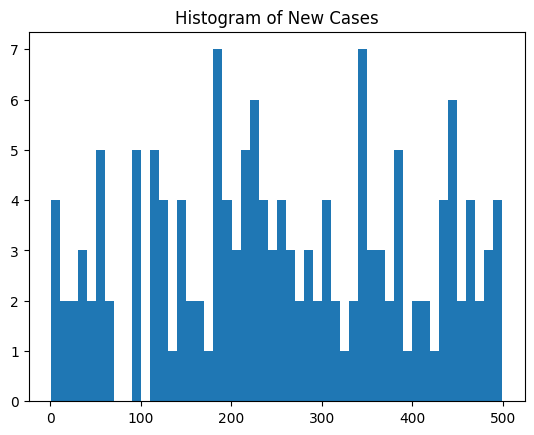

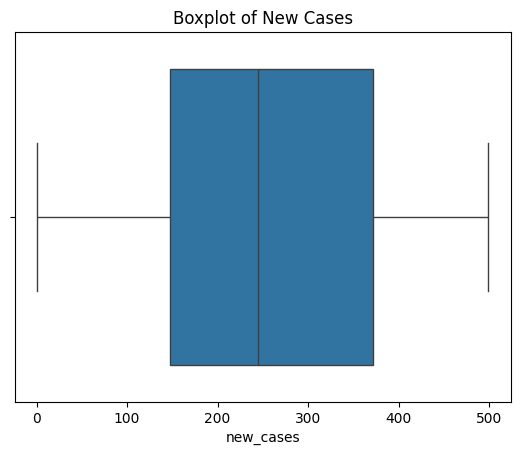

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.hist(covid_data["new_cases"].dropna(), bins=50)
plt.title("Histogram of New Cases")
plt.show()

# Boxplot
sns.boxplot(x=covid_data["new_cases"])
plt.title("Boxplot of New Cases")
plt.show()
